In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
returns = pd.read_csv("../Data/StockReturns.csv")
train = pd.read_csv("../Data/TrainPredictions/RL_weights_Sharpe_esg_True.csv")
valid = pd.read_csv("../Data/ValidPredictions/RL_weights_Sharpe_esg_True.csv")
test = pd.read_csv("../Data/TestPredictions/RL_weights_Sharpe_esg_True.csv")

In [3]:
train.shape[0]+ valid.shape[0]+test.shape[0]
# Train: 8766 - 8803
# Valid: 495 - 498
# Test: 479 - 479

9654

In [4]:
a = train.shape[0]
b = valid.shape[0]
c = test.shape[0]

In [5]:
train_pred = []

for i in range(0, a,1):
    day = np.dot(returns.iloc[i+1],train.iloc[i])
    train_pred.append(day+1)
cumprod_train = np.cumprod(train_pred)

In [6]:
valid_pred = []

for i in range(a, a+b,1):
    day = np.dot(returns.iloc[i+1],valid.iloc[i-(a)])
    valid_pred.append(day+1)
cumprod_valid = np.cumprod(valid_pred)

In [7]:
test_pred = []

for i in range(a+b, a+b+c-1,1):
    # print(i)
    day = np.dot(returns.iloc[i+1],test.iloc[i-(a+b)])
    test_pred.append(day+1)
cumprod_test = np.cumprod(test_pred)

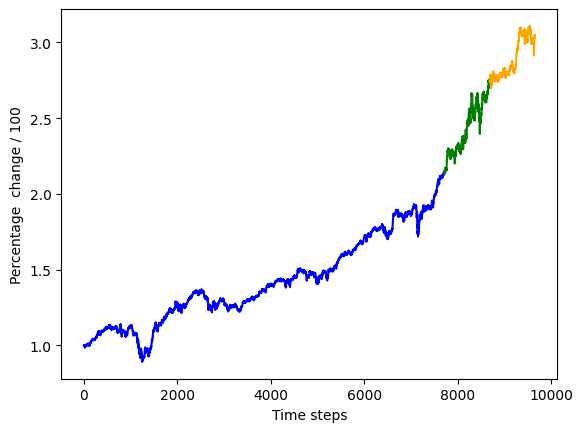

In [8]:
fig, ax = plt.subplots()
ax.plot(cumprod_train, color="blue")
ax.plot(np.linspace(a, a+b,b),
        cumprod_valid +cumprod_train[-1]-1,
        color="green")
ax.plot(np.linspace(a+b, a+b+c-1,c-1),
        cumprod_test +cumprod_valid[-1]+cumprod_train[-1]-2,
        color="orange")
ax.set_xlabel("Time steps")
ax.set_ylabel("Percentage  change / 100")
# ax.set_xlim(8500,10000)
# ax.set_ylim(2, 2.8)
plt.show()

In [9]:
import seaborn as sns

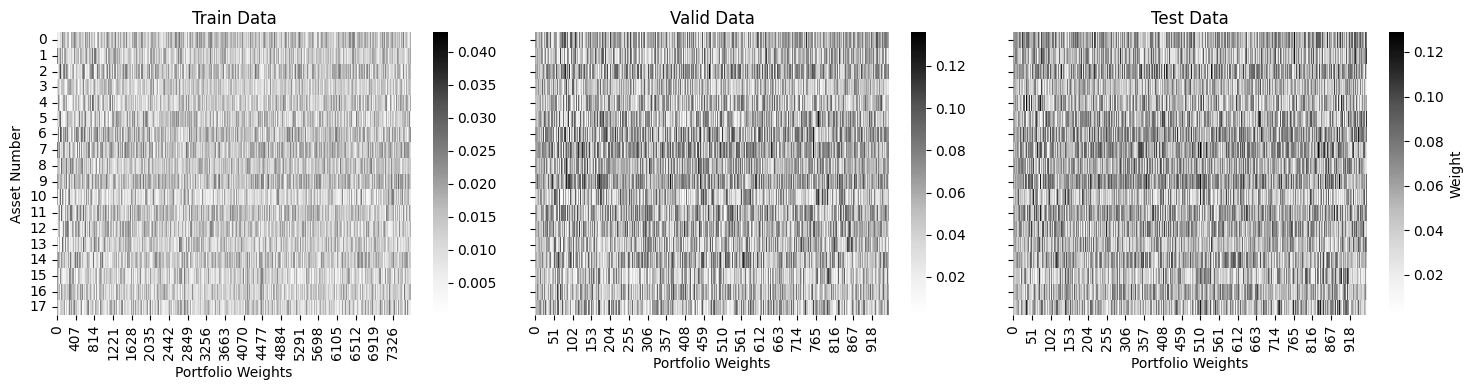

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

# Plot KDE for three different columns
sns.heatmap(train.T, cmap="Greys", ax = ax[0])
ax[0].set_title("Train Data")
ax[0].set_xlabel("Portfolio Weights")
ax[0].set_ylabel("Asset Number")


sns.heatmap(valid.T, cmap="Greys", ax = ax[1])
ax[1].set_title("Valid Data")
ax[1].set_xlabel("Portfolio Weights")

sns.heatmap(test.T, cmap="Greys", cbar_kws={'label': 'Weight'}, ax = ax[2])
ax[2].set_title("Test Data")
ax[2].set_xlabel("Portfolio Weights")


plt.tight_layout()
plt.show()